#Time_Series_Assignment_R

The data contains monthly sales (in million USD) of a leading processed food manufacturer in USA. Data for 3 business units, from February 2015 to January 2018, is provided in the same file.


Columns – Year, Month, BU1, BU2, BU3

Number of observations – 36 for each business **unit**

In [ ]:
 # Install and load the tseries package
install.packages("tseries")
install.packages("forecast")
install.packages("urca")

library(tseries)
library(urca)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Question 1. Import ‘USA Firm Sales’ data in R
---

In [ ]:
salesdata = read.csv("/content/USA FIRM SALES DATA.csv")

In [ ]:
head(salesdata)

,Year,Month,BU1,BU2,BU3
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,2015,February,125.1,115.5,113.8
2,2015,March,123.6,115.7,113.8
3,2015,April,123.1,116.5,114.0
4,2015,May,123.1,117.7,114.1
5,2015,June,123.4,118.3,114.7
6,2015,July,124.0,118.7,115.1


# Question 2. Create time series objects of the data

---
 Using the ts function to create time series objects for each business unit. The start date is February 2015, and the end date is January 2018. Since the data is monthly, the frequency will be 12.


In [ ]:
# Business Unit 1
sales_BU1 <- ts(salesdata$BU1, start = c(2015, 2), end = c(2018, 1), frequency = 12)
#The frequency = 12 argument specifies that the data is monthly (12 observations per year)

# Business Unit 2
sales_BU2 <- ts(salesdata$BU2, start = c(2015, 2), end = c(2018, 1), frequency = 12)

# Business Unit 3
sales_BU3 <- ts(salesdata$BU3, start = c(2015, 2), end = c(2018, 1), frequency = 12)

#Question 3. Check for stationarity for each of the three series
---
Checking for stationarity in each of the three time series plotting the series and their autocorrelation function (ACF).

Also performing the Augmented Dickey-Fuller (ADF) test.

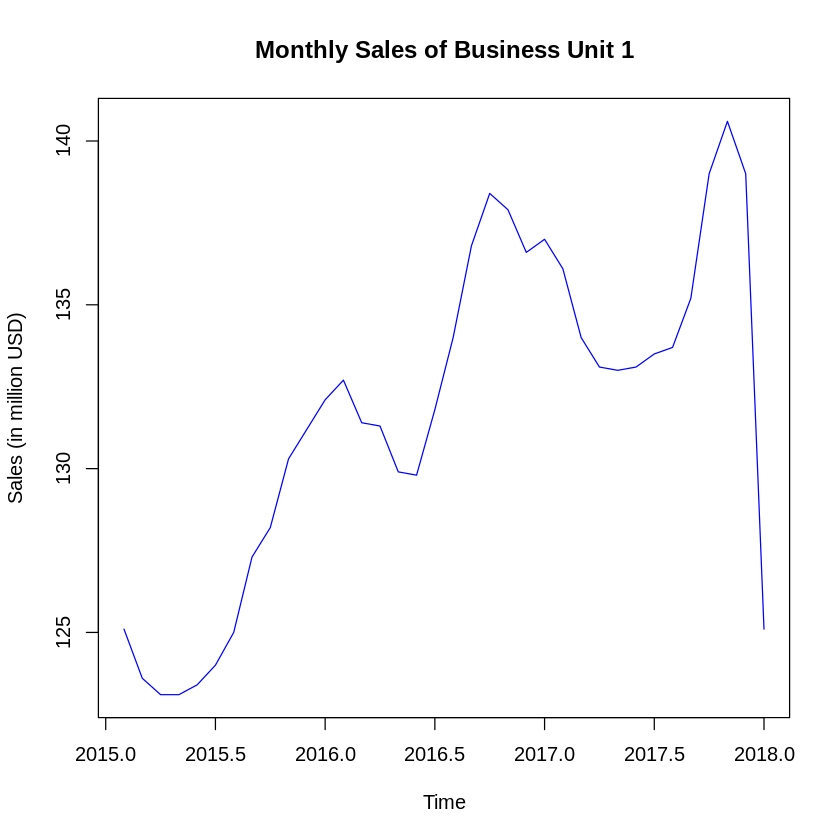

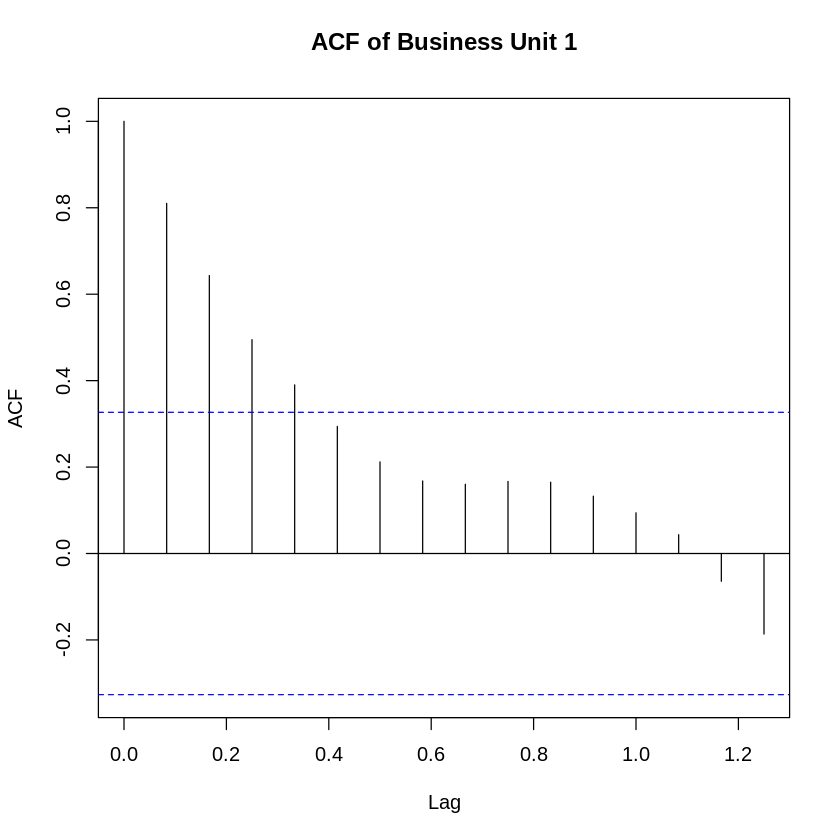

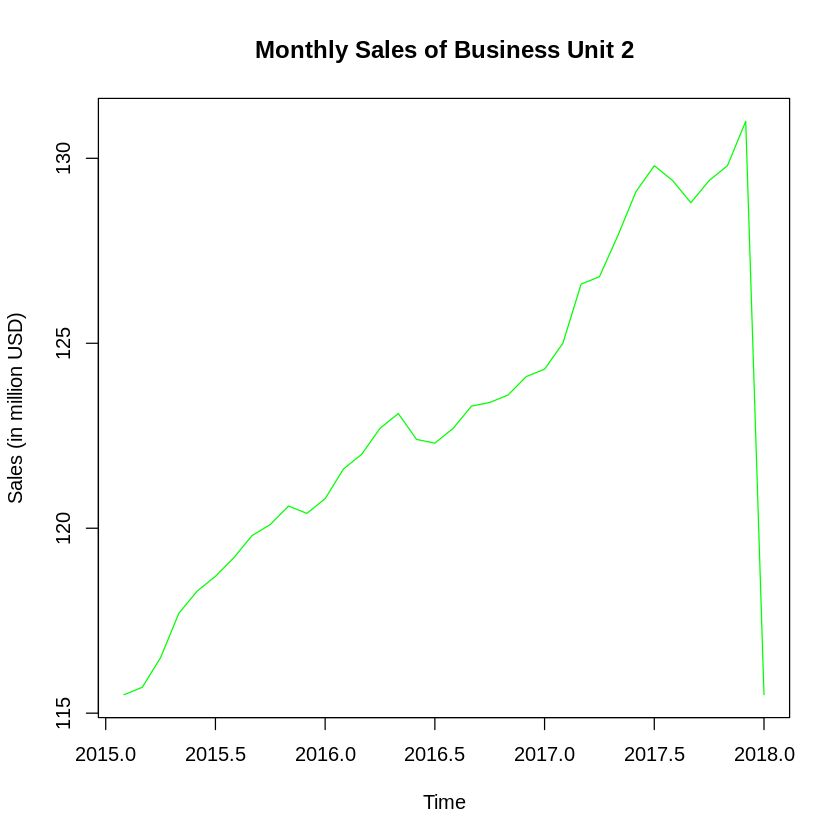

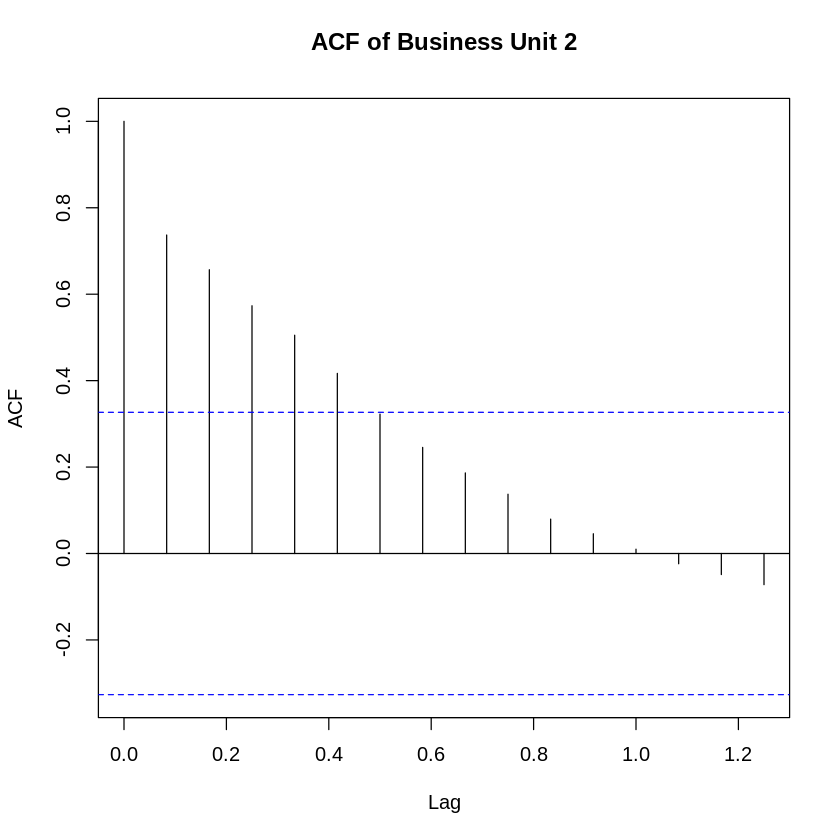

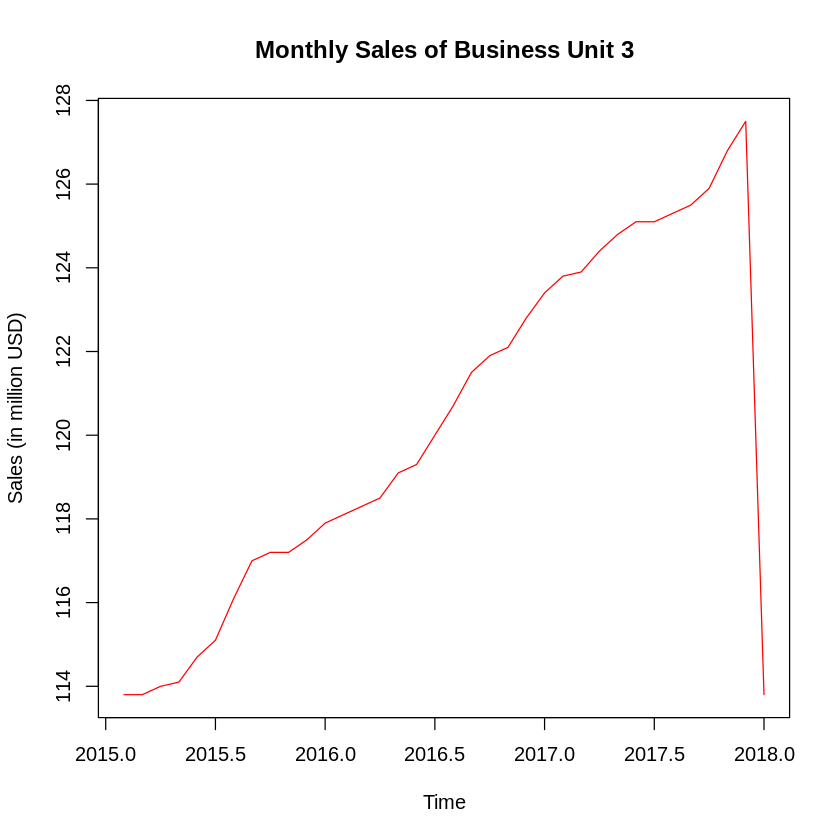

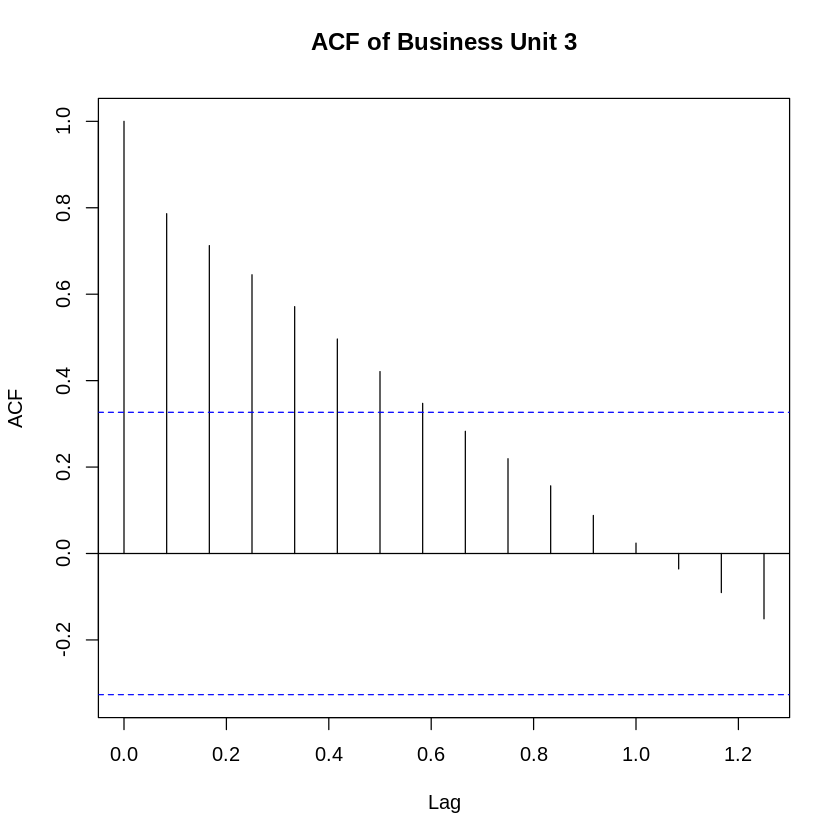

In [ ]:
# Plotting each time series
#par(mfrow = c(3, 1))

plot(sales_BU1, col = "blue", main = "Monthly Sales of Business Unit 1", ylab = "Sales (in million USD)")
acf(sales_BU1, main = "ACF of Business Unit 1")

plot(sales_BU2, col = "green", main = "Monthly Sales of Business Unit 2", ylab = "Sales (in million USD)")
acf(sales_BU2, main = "ACF of Business Unit 2")

plot(sales_BU3, col = "red", main = "Monthly Sales of Business Unit 3", ylab = "Sales (in million USD)")
acf(sales_BU3, main = "ACF of Business Unit 3")

#par(mfrow = c(1, 1))

Comment: A slow decaying ACF suggests non-stationarity.

In [ ]:
# ADF Test for Business Unit 1
summary(ur.df(sales_BU1,lag=0))

# ADF Test for Business Unit 2
summary(ur.df(sales_BU2,lag=0))

# ADF Test for Business Unit 3
summary(ur.df(sales_BU3,lag=0))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8700  -0.6719   0.3265   1.2778   3.8292 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)
z.lag.1 -0.0002156  0.0035612  -0.061    0.952

Residual standard error: 2.78 on 34 degrees of freedom
Multiple R-squared:  0.0001078,	Adjusted R-squared:  -0.0293 
F-statistic: 0.003666 on 1 and 34 DF,  p-value: 0.9521


Value of test-statistic is: -0.0605 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4685   0.2297   0.4311   0.7296   1.6300 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)
z.lag.1 -0.0002402  0.0037587  -0.064    0.949

Residual standard error: 2.741 on 34 degrees of freedom
Multiple R-squared:  0.0001201,	Adjusted R-squared:  -0.02929 
F-statistic: 0.004084 on 1 and 34 DF,  p-value: 0.9494


Value of test-statistic is: -0.0639 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6754   0.2228   0.4221   0.6233   1.0222 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)
z.lag.1 -0.0001929  0.0033680  -0.057    0.955

Residual standard error: 2.399 on 34 degrees of freedom
Multiple R-squared:  9.643e-05,	Adjusted R-squared:  -0.02931 
F-statistic: 0.003279 on 1 and 34 DF,  p-value: 0.9547


Value of test-statistic is: -0.0573 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61


Comment BU1:
The test statistic (-0.0605) is much higher (less negative) than all the critical values at the 1%, 5%, and 10% levels.
This indicates that the null hypothesis cannot be rejected.
Hence, Time series is non-stationary.

Comment BU2:
The test statistic (-0.0639) is much higher (less negative) than all the critical values at the 1%, 5%, and 10% levels.
This indicates that the null hypothesis  cannot be rejected.
Hence, Time series is non-stationary.

Comment BU3:
The test statistic (-0.0573) is much higher (less negative) than all the critical values at the 1%, 5%, and 10% levels.
This indicates that the null hypothesis  cannot be rejected.
Hence, Time series is non-stationary.

In [ ]:
ndiffs(sales_BU1)
ndiffs(sales_BU2)
ndiffs(sales_BU3)

[1] 1

[1] 1

[1] 1

Timeseries should be differenced at least 1 time to achieve stationarity.

Based on diferent trials I have seen that to achivie stationarity the following is needed:

Timeseries sales_BU1 has been differenced 3 time
Timeseries sales_BU2 has been differenced 3 time
Timeseries sales_BU4 has been differenced 5 time

Note: Timeseries sales_BU3 has been differenced 5 time because the test statistic when differencied 4 time was only marginally less than the 5% level.

In [ ]:
# The command summary(ur.df( data, lag=0)) is used to perform and summarize the results
# of the Dickey-Fuller test for stationarity on the time series data

sales_BU1diff<-diff(sales_BU1,differences=3)
summary(ur.df(sales_BU1diff,lag=0))  #DF-test

sales_BU2diff<-diff(sales_BU2,differences=3)
summary(ur.df(sales_BU2diff,lag=0))  #DF-test

sales_BU3diff<-diff(sales_BU3,differences=5)
summary(ur.df(sales_BU3diff,lag=0))  #DF-test


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4193 -1.5886 -0.1491  1.0946  2.9151 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
z.lag.1  -1.3193     0.2336  -5.648 3.35e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.383 on 31 degrees of freedom
Multiple R-squared:  0.5072,	Adjusted R-squared:  0.4913 
F-statistic:  31.9 on 1 and 31 DF,  p-value: 3.35e-06


Value of test-statistic is: -5.6481 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.4092  -0.7726  -0.1681   0.4295   2.3817 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)   
z.lag.1  -2.0908     0.5775   -3.62  0.00104 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.114 on 31 degrees of freedom
Multiple R-squared:  0.2971,	Adjusted R-squared:  0.2745 
F-statistic: 13.11 on 1 and 31 DF,  p-value: 0.001037


Value of test-statistic is: -3.6202 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1351  -1.1603   0.2029   0.5437   1.9762 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
z.lag.1  -1.5774     0.3024  -5.217 1.39e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.641 on 29 degrees of freedom
Multiple R-squared:  0.4841,	Adjusted R-squared:  0.4663 
F-statistic: 27.22 on 1 and 29 DF,  p-value: 1.388e-05


Value of test-statistic is: -5.2169 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.62 -1.95 -1.61


Comparing the test statistic with the critical values, to make a decision about the stationarity of the series.

Comment BU1:
The value of the test statistic is: -5.6481, which is less than 5% critical value. Hence, Stationarity is achieved with 3rd order difference.

Comment BU2:
The value of the test statistic is: -3.6202, which is less than 5% critical value. Hence, Stationarity is achieved with 3rd order difference.

Comment BU3:
The value of the test statistic is: -5.2169, which is less than 5% critical value. Hence, Stationarity is achieved with **5th** order difference.

# Question 4. Obtain best model for each BU.

---

Using the ACF and PACF plots for the differenced series of the three business units sales data to define the parameters p, q, P, Q.


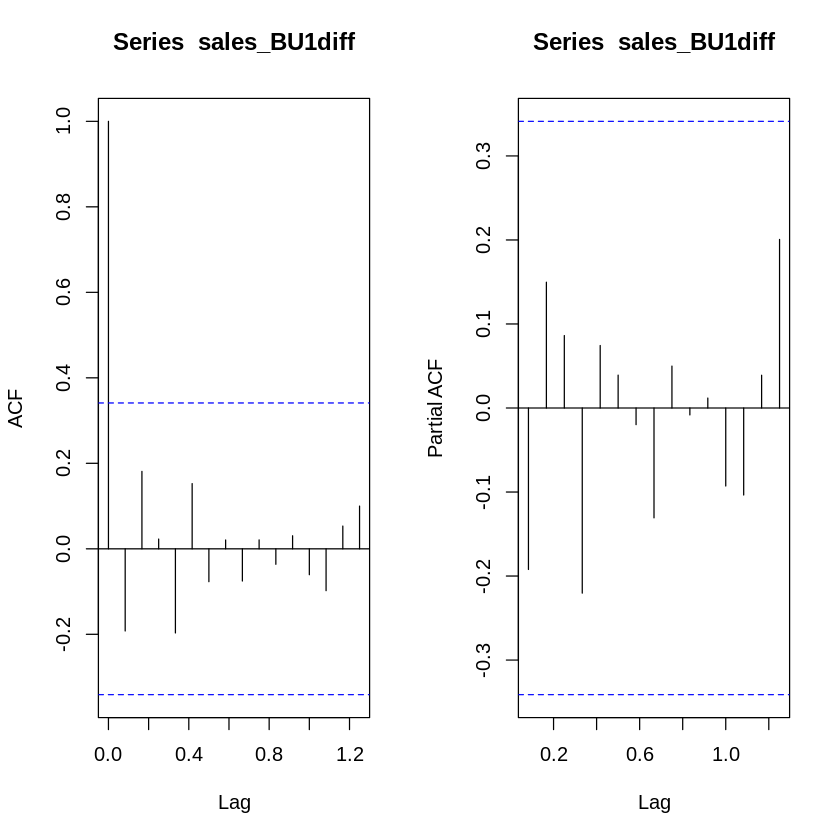

In [ ]:
par(mfrow = c(1, 2))
acf(sales_BU1diff)
pacf(sales_BU1diff)

Comment:

ACF Plot:  We can estimate 1 MA terms (q=1), since we have lag 1 out of the confidence interval, and lag 2 is in the blue area.

PACF Plot: looking at the PACF plot above, we can estimate to use 1 AR terms for our model (p=1), since lag is in the blue area.

There is no hint of seasonality so P and Q are zeros.


max.p=1: PACF cuts off after lag 1, suggesting AR(1)

max.q=1: ACF cuts off after lag 1, suggesting MA(1)

max.P=0: No seasonal AR component is apparent.

max.Q=0: No seasonal MA component is apparent.

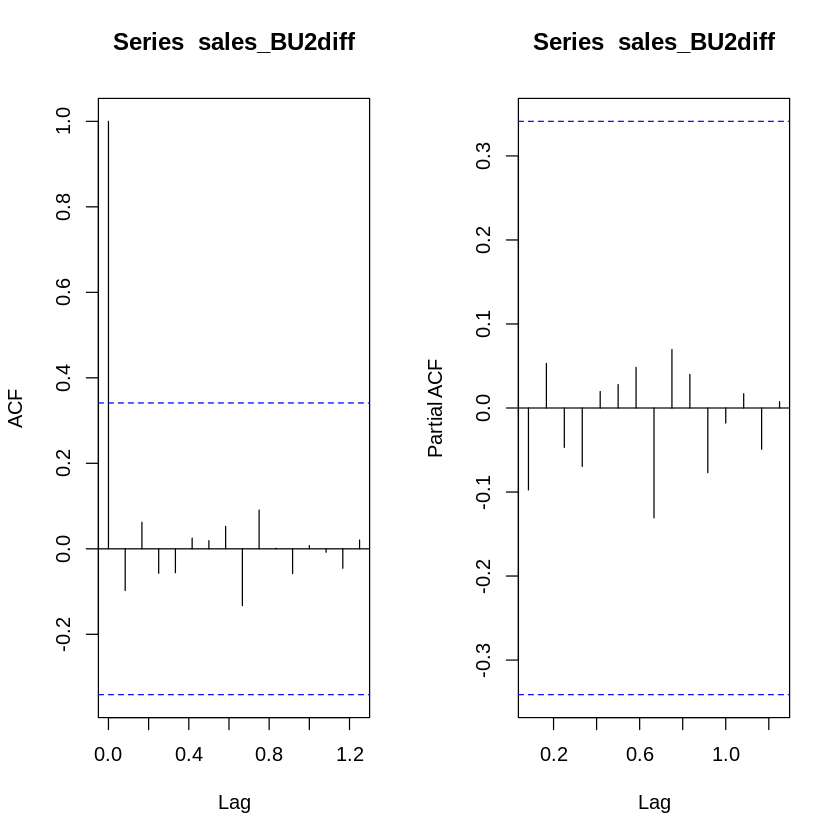

In [ ]:
par(mfrow = c(1, 2))
acf(sales_BU2diff)
pacf(sales_BU2diff)

Comment:

ACF Plot:  We can estimate 1 MA terms (q=1), since we have lag 1 out of the confidence interval, and lag 2 is in the blue area.

PACF Plot: looking at the PACF plot above, we can estimate to use 1 AR terms for our model (p=1), since lag is in the blue area.

There is no hint of seasonality so P and Q are zeros.

max.p=1: PACF cuts off after lag 1, suggesting AR(1)

max.q=1: ACF cuts off after lag 1, suggesting MA(1)

max.P=0: No seasonal AR component is apparent.

max.Q=0: No seasonal MA component is apparent.

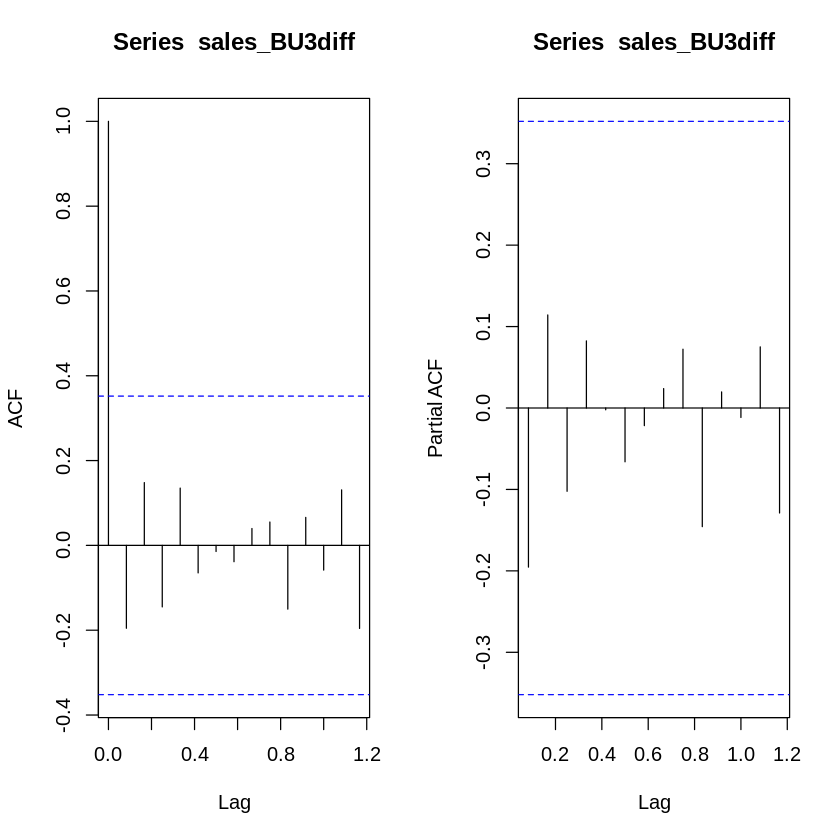

In [ ]:
par(mfrow = c(1, 2))
acf(sales_BU3diff)
pacf(sales_BU3diff)

Comment:

ACF Plot:  We can estimate 1 MA terms (q=1), since we have lag 1 out of the confidence interval, and lag 2 is in the blue area.

PACF Plot: looking at the PACF plot above, we can estimate to use 1 AR terms for our model (p=1), since lag is in the blue area.

There is no hint of seasonality so P and Q are zeros.


max.p=1: PACF cuts off after lag 1, suggesting AR(1)

max.q=1: ACF cuts off after lag 1, suggesting MA(1)

max.P=0: No seasonal AR component is apparent.

max.Q=0: No seasonal MA component is apparent.

In [ ]:
sales_BU1model <- auto.arima(sales_BU1, d=3, D=0, max.p=2, max.q=2, max.P=2, max.Q=2, trace=TRUE, ic="aic")

Warning message in auto.arima(sales_BU1, d = 3, D = 0, max.p = 2, max.q = 2, max.P = 2, :
“Having 3 or more differencing operations is not recommended. Please consider reducing the total number of differences.”



 ARIMA(2,3,2)(1,0,1)[12]                    : Inf
 ARIMA(0,3,0)                               : 152.8724
 ARIMA(1,3,0)(1,0,0)[12]                    : 154.2804
 ARIMA(0,3,1)(0,0,1)[12]                    : 154.8749
 ARIMA(0,3,0)(1,0,0)[12]                    : 154.7167
 ARIMA(0,3,0)(0,0,1)[12]                    : 154.578
 ARIMA(0,3,0)(1,0,1)[12]                    : Inf
 ARIMA(1,3,0)                               : 153.0408
 ARIMA(0,3,1)                               : 153.649
 ARIMA(1,3,1)                               : 154.6854

 Best model: ARIMA(0,3,0)                               



In [ ]:
sales_BU1model

Series: sales_BU1 
ARIMA(0,3,0) 

sigma^2 = 5.665:  log likelihood = -75.44
AIC=152.87   AICc=153   BIC=154.37

In [ ]:
sales_BU2model <- auto.arima(sales_BU2, d=3, D=0, max.p=2, max.q=2, max.P=0, max.Q=0, trace=TRUE, ic="aic")

Warning message in auto.arima(sales_BU2, d = 3, D = 0, max.p = 2, max.q = 2, max.P = 0, :
“Having 3 or more differencing operations is not recommended. Please consider reducing the total number of differences.”



 ARIMA(2,3,2)                               : 176.7246
 ARIMA(0,3,0)                               : 172.164
 ARIMA(1,3,0)                    : Inf
 ARIMA(0,3,1)                               : 171.4092
 ARIMA(1,3,1)                    : Inf
 ARIMA(0,3,2)                               : Inf
 ARIMA(1,3,2)                    : Inf

 Best model: ARIMA(0,3,1)                               



In [ ]:
sales_BU2model

Series: sales_BU2 
ARIMA(0,3,1) 

Coefficients:
          ma1
      -0.8133
s.e.   0.2435

sigma^2 = 9.33:  log likelihood = -83.7
AIC=171.41   AICc=171.81   BIC=174.4

In [ ]:
sales_BU3model <- auto.arima(sales_BU3, d=5, D=0, max.p=2, max.q=2, max.P=0, max.Q=0, trace=TRUE, ic="aic")

Warning message in auto.arima(sales_BU3, d = 5, D = 0, max.p = 2, max.q = 2, max.P = 0, :
“Having 3 or more differencing operations is not recommended. Please consider reducing the total number of differences.”



 ARIMA(2,5,2)                               : 160.3325
 ARIMA(0,5,0)                               : 156.3718
 ARIMA(1,5,0)                               : 154.9116
 ARIMA(0,5,1)                               : 155.406
 ARIMA(2,5,0)                               : 156.8595
 ARIMA(1,5,1)                               : 156.5367
 ARIMA(2,5,1)                               : 158.4938

 Best model: ARIMA(1,5,0)                               



In [ ]:
sales_BU3model

Series: sales_BU3 
ARIMA(1,5,0) 

Coefficients:
          ar1
      -0.5469
s.e.   0.2748

sigma^2 = 6.86:  log likelihood = -75.46
AIC=154.91   AICc=155.34   BIC=157.78

Diagnose the Residuals.

Checking the residuals of the fitted model to ensure they resemble white noise. This involves examining the ACF and PACF plots of the residuals and conducting the statistical Box-Pierce test.


	Box-Pierce test

data:  resi_BU1
X-squared = 1.3293, df = 1, p-value = 0.2489


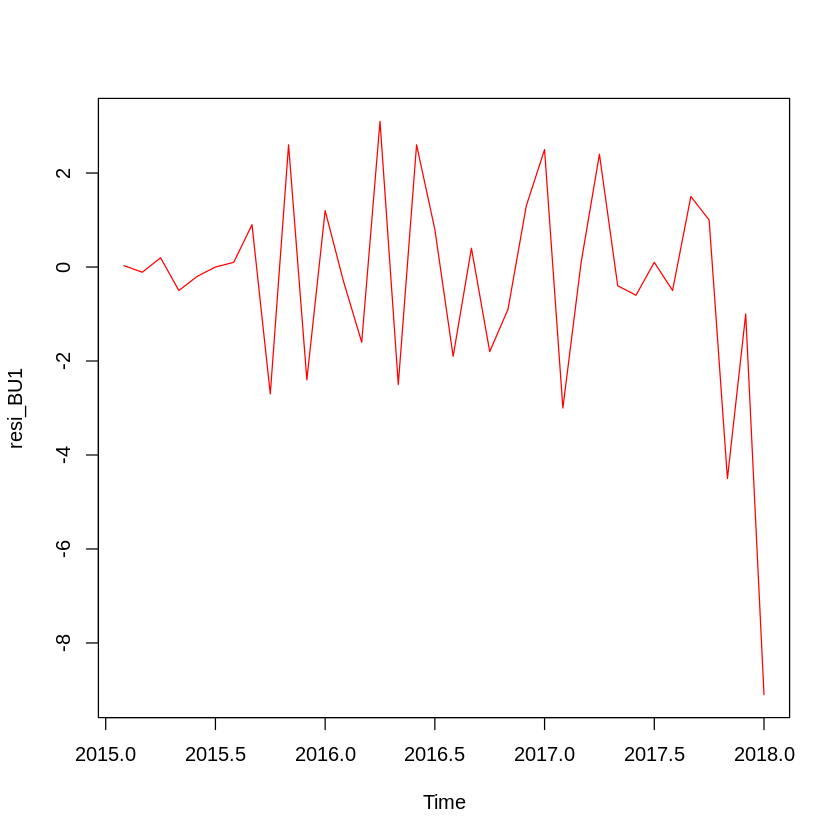

In [ ]:
resi_BU1<-residuals(sales_BU1model)
Box.test(resi_BU1)
plot(resi_BU1,col="red")

Comment: p-value is 0.2489, there is no significant autocorrelation in the residuals.


	Box-Pierce test

data:  resi_BU2
X-squared = 0.12704, df = 1, p-value = 0.7215


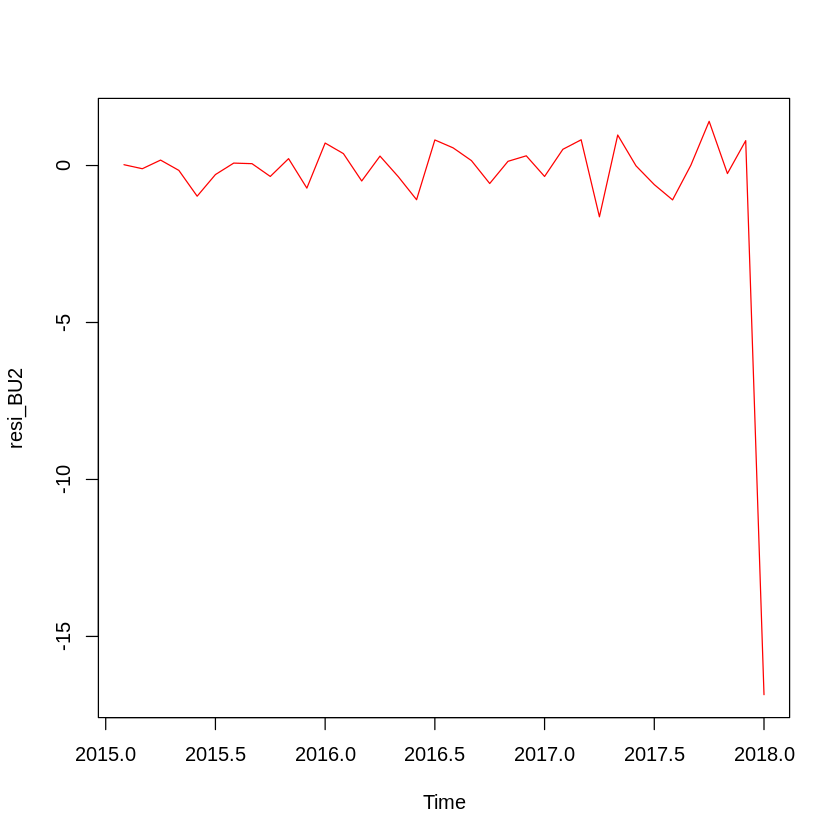

In [ ]:
resi_BU2<-residuals(sales_BU2model)
Box.test(resi_BU2)
plot(resi_BU2,col="red")

Comment: p-value is 0.7215, there is no significant autocorrelation in the residuals.


	Box-Pierce test

data:  resi_BU3
X-squared = 0.0023428, df = 1, p-value = 0.9614


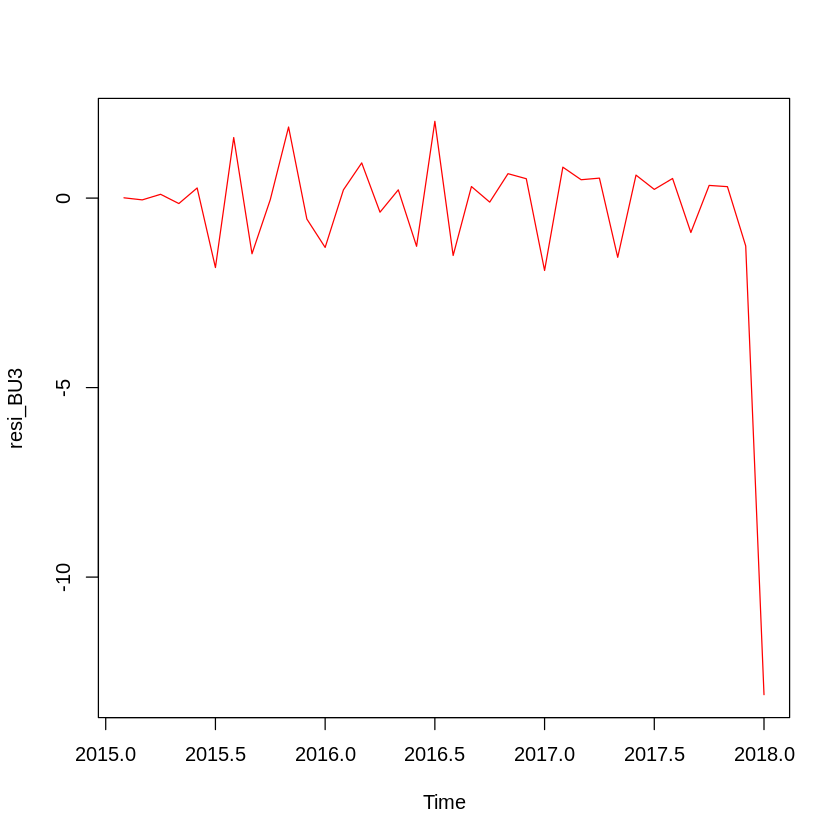

In [ ]:
resi_BU3<-residuals(sales_BU3model)
Box.test(resi_BU3)
plot(resi_BU3,col="red")

Comment: p-value is 0.9614, there is no significant autocorrelation in the residuals.

# Question 5. Predict sales for each BU for January 2018, February 2018, March 2018

---

In [ ]:
predict(sales_BU1model,n.ahead=3)

,Feb,Mar,Apr
2018,98.9,60.4,9.6
,Feb,Mar,Apr
2018,2.380106,7.526556,16.142664


Comment:

Feb 2018: Predicted value is 98.9 with a standard error of 2.380106.

Mar 2018: Predicted value is 60.4 with a standard error of 7.526556.

Apr 2018: Predicted value is 9.6 with a standard error of 16.142664.

The predictions decrease significantly over the months, and the uncertainty around the predictions increases, as reflected in the rising standard errors.



In [ ]:
predict(sales_BU2model,n.ahead=3)

,Feb,Mar,Apr
2018,97.00875,75.52625,51.05250
,Feb,Mar,Apr
2018,3.054474,7.344432,13.121903


Comment:

The predictions decrease significantly over the months, and the uncertainty around the predictions increases, as reflected in the rising standard errors.

In [ ]:
predict(sales_BU3model,n.ahead=3)

,Feb,Mar,Apr
2018,64.83584,-50.65911,-272.30958
,Feb,Mar,Apr
2018,2.61915,11.95389,35.01274


Comment:

The predictions decrease significantly over the months, and the uncertainty around the predictions increases, as reflected in the rising standard errors.